# Thermolysin ligands for pharmacophore identification

We explore thrombing ligands that will be used to create ligand-based pharmacophore models

In [1]:
import openpharmacophore as oph

import pandas as pd
import nglview as nv
from rdkit import Chem
from rdkit.Chem import Draw

import os
from pprint import pprint

## Load  and visualize ligands

We load the ligands from their respective smiles and draw their molecular structures

In [2]:
lig_df = pd.read_csv("ligands.csv")
lig_df

,Smiles,PDBID,LigID
0,CC(C)C[C@H](C(=O)OC)N(C(=O)C)O,7TLN,INC
1,C[C@@H](C(=O)NCC(=O)Nc1ccc(cc1)[N+](=O)[O-])NC...,5TLN,BAN
2,c1ccc(cc1)C[C@H](CC(=O)O)C(=O)O,1HYT,BZS


In [3]:
def load_mols_from_sdf():
    """ Load ligands from sdf files in this directory.
    """
    mols = []
    legends = []
    for root, dirs, filenames in os.walk("./"):
        for file in filenames:
            if file.endswith(".sdf"):
                supp = Chem.SDMolSupplier(file)
                mol = next(supp)
                mol.RemoveAllConformers()
                mols.append(mol)
                
                legends.append(file.split(".")[0])
    
    return mols, legends

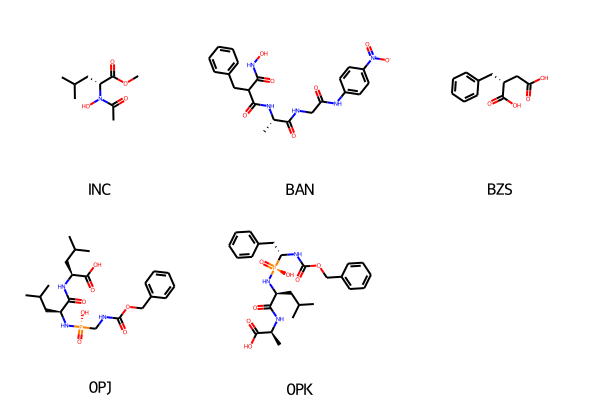

In [4]:
ligs_1 = [
    Chem.MolFromSmiles(smi.encode("unicode_escape")) for smi in lig_df["Smiles"]
]
legends_1 = [l for l in lig_df["LigID"]]

ligs_2, legends_2 = load_mols_from_sdf()

ligands = ligs_1 + ligs_2
legends = legends_1 + legends_2
assert all([l is not None for l in ligands])

Draw.MolsToGridImage(ligands, legends=legends)

## Preparing the ligands

We'll generate different conformers for each of the ligands and add hydrogens to them
as well.

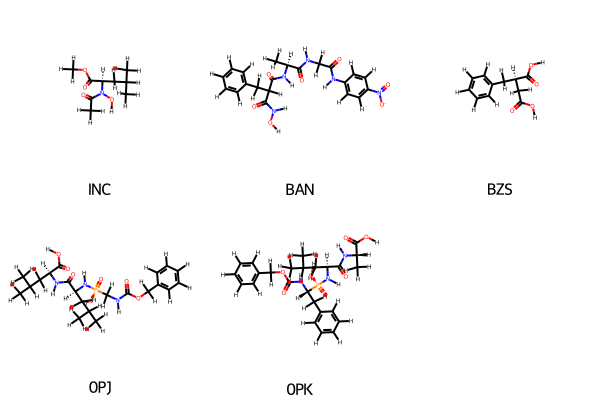

In [5]:
# Add hydrogens and draw them again

pharmacophore = oph.LigandBasedPharmacophore()
pharmacophore.ligands = ligands
pharmacophore.add_hydrogens(ligands="all")

Draw.MolsToGridImage(pharmacophore.ligands, legends=legends)

In [6]:
pharmacophore.generate_conformers(ligands="all", n_confs=10)

## View 3D structures

In [11]:
index = 4
nv.show_rdkit(pharmacophore.ligands[index])

NGLWidget()